In [96]:
# Packages
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from house_prices.adhoc_functions.model import vis_all
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [3]:
# Options
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [25]:
explore_in = './data/transformed_data/explore.csv'
train_in = './data/transformed_data/model_train_tree.csv'
sub_in = './data/transformed_data/model_test_tree.csv'
model_out = './data/transformed_data/tree_models.csv'

In [26]:
def rmse(pred, true):
    error = 0
    for x,y in zip(pred,true):
        error+=(x-y)**2
    error/=len(pred)
    return np.sqrt(error)


def validate_model(model, train_features, train_target, test_features, test_target):
    model.fit(train_features, train_target)
    print("Training Error: ", rmse(model.predict(train_features), train_target))
    print("Test Error: ", rmse(model.predict(test_features), test_target))

In [118]:
drop_vars = [
    'Id', 'Neighborhood', 'MSZoning', 'BldgType', 'Functional', 'MSSubClass', 
    'Condition1', 'LotConfig', 'MasVnrType', 'SaleType', 'SaleCondition', 'Stories', 'SalePrice',
    'Foundation', 'HouseStyle'
]


keep_vars = [
    'OverallQual',
#     'ExterQual',
#     'ExterCond',
#     'OverallCond',
    'TotalBsmtSF',
    '1stFlrSF',
#     '2ndFlrSF',
    'GrLivArea',
#     'LotArea',
#     'BsmtFullBath',
#     'BsmtHalfBath',
#     'YearBuilt',
#     'FullBath',
#     'HalfBath',
#     'TotRmsAbvGrd',
#     'BedroomAbvGr',
#     'KitchenAbvGr',
#     'HeatingQC',
#     'GarageCars',
#     'OpenPorchSF',
#     'YearRemodAdd',
#     'YrSold',
#     'PoolArea',
#     'WoodDeckSF',
#     'MasVnrArea',
#     'KitchenQual',
#     'Fireplaces',
    'GarageArea',
#     'HasPorch',
#     'IsRemodelled',
    'PropertyAge',
#     'TotalBath',
#     'HasPool',
#     'HasDeck',
    'OverallGrade',
#     'ExterGrade',
    'TotalArea',
    'CoreArea',
    'Neighborhood_label',
#     'MSZoning_label',
#     'BldgType_label',
#     'Functional_label',
#     'MSSubClass_label',
#     'Condition1_label',
#     'LotConfig_label',
#     'MasVnrType_label',
#     'SaleType_label',
    'SaleCondition_label',
#     'Foundation_label'
]

test_vars = keep_vars.copy()

#### Train Data

In [119]:
df_train_in = pd.read_csv(train_in)
features = df_train_in[keep_vars]
target = np.log1p(df_train_in['SalePrice'])
features.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,PropertyAge,OverallGrade,TotalArea,CoreArea,Neighborhood_label,SaleCondition_label
0,7,856,856,1710,548,5,35,4276,2566,5,1
1,6,1262,1262,1262,460,31,48,3786,2524,24,1
2,7,920,920,1786,608,7,35,4492,2706,5,1
3,7,756,961,1717,642,91,35,4190,2473,6,0
4,8,1145,1145,2198,836,8,40,5541,3343,15,1


In [120]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state = 42
)

train_features = train_features.as_matrix()
test_features = test_features.as_matrix()
train_target = train_target.as_matrix()
test_target = test_target.as_matrix()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### Submission Data

In [104]:
df_sub_in = pd.read_csv(sub_in)
sub_features = df_sub_in[keep_vars]
sub_features.head()

,OverallQual,ExterQual,ExterCond,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,LotArea,BsmtFullBath,BsmtHalfBath,YearBuilt,FullBath,HalfBath,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,HeatingQC,GarageCars,OpenPorchSF,YearRemodAdd,YrSold,PoolArea,WoodDeckSF,MasVnrArea,KitchenQual,Fireplaces,GarageArea,HasPorch,IsRemodelled,PropertyAge,TotalBath,HasPool,HasDeck,OverallGrade,ExterGrade,TotalArea,CoreArea,Neighborhood_label,MSZoning_label,BldgType_label,Functional_label,MSSubClass_label,Condition1_label,LotConfig_label,MasVnrType_label,SaleType_label,SaleCondition_label,Foundation_label
0,5,3,3,6,882.0,896,0,896,11622,0.0,0.0,1961,1.0,0.0,5,2,1,3,1.0,0,1961,5,0,140,0.0,3,0,730.0,0,1,49,1.0,0,1,30,9,2674.0,1778.0,12,3,0,7,5,1,4,2,2,1,1
1,6,3,3,6,1329.0,1329,0,1329,14267,0.0,0.0,1958,1.0,1.0,6,3,1,3,1.0,36,1958,5,0,393,108.0,4,0,312.0,1,1,52,1.5,0,1,36,9,3987.0,2658.0,12,4,0,7,5,2,0,1,2,1,1
2,5,3,3,5,928.0,928,701,1629,13830,0.0,0.0,1997,2.0,1.0,6,3,1,4,2.0,34,1998,5,0,212,0.0,3,1,482.0,1,0,13,2.5,0,1,25,9,4186.0,2557.0,8,4,0,7,10,2,4,2,2,1,3
3,6,3,3,6,926.0,926,678,1604,9978,0.0,0.0,1998,2.0,1.0,7,3,1,5,2.0,36,1998,5,0,360,20.0,4,1,470.0,1,1,12,2.5,0,1,36,9,4134.0,2530.0,8,4,0,7,10,2,4,1,2,1,3
4,8,4,3,5,1280.0,1280,0,1280,5005,0.0,0.0,1992,2.0,0.0,5,2,1,5,2.0,82,1992,5,0,0,0.0,4,0,506.0,1,1,18,2.0,0,0,40,12,3840.0,2560.0,22,4,4,7,0,2,4,2,2,1,3


#### Random Forest

In [88]:
param_grid = {
    'max_depth': [4],
    'n_estimators': [150],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4]
}

rf = GridSearchCV(cv=5, estimator=RandomForestRegressor(), param_grid=param_grid)
validate_model(rf, train_features, train_target, test_features, test_target)
rf.best_params_

Training Error:  0.15216199519483192
Test Error:  0.18286739064287325


{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 150}

In [121]:
param_grid = {
    'max_depth': [8],
    'min_samples_leaf':[2],
    'min_samples_split':[2],
    'n_estimators': [100],
}

rf = GridSearchCV(cv=5, estimator=RandomForestRegressor(), param_grid=param_grid)
validate_model(rf, train_features, train_target, test_features, test_target)
rf.best_params_

Training Error:  0.0900510313137371
Test Error:  0.15502016995290396


{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
Training Error:  0.07811247243011994
Test Error:  0.14914949611134615
{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

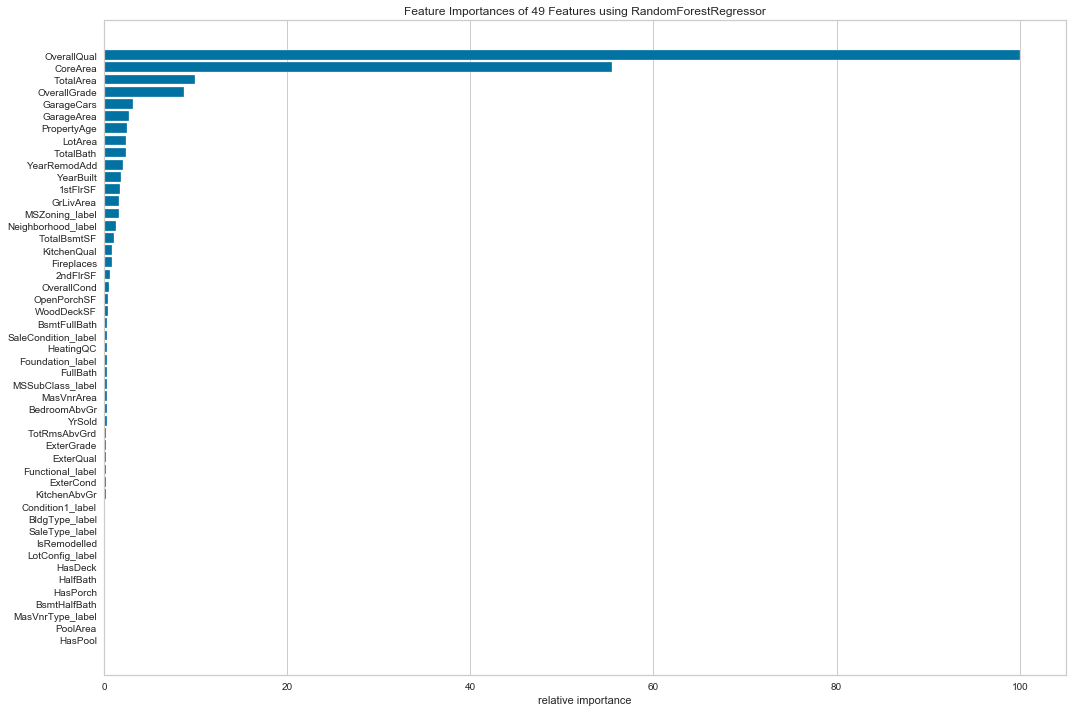

In [117]:
rf = RandomForestRegressor(
    max_depth=8,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100
)
rf.fit(features, target)

fig = plt.figure()
ax = fig.add_subplot()
vis_feat_importance = FeatureImportances(rf, ax=ax, size=(1080, 720))
vis_feat_importance.fit(features, target)
vis = vis_feat_importance.poof()

In [ ]:
keep_vars = [
    'OverallQual',
#     'ExterQual',
#     'ExterCond',
#     'OverallCond',
    'TotalBsmtSF',
    '1stFlrSF',
#     '2ndFlrSF',
    'GrLivArea',
#     'LotArea',
#     'BsmtFullBath',
#     'BsmtHalfBath',
#     'YearBuilt',
#     'FullBath',
#     'HalfBath',
#     'TotRmsAbvGrd',
#     'BedroomAbvGr',
#     'KitchenAbvGr',
#     'HeatingQC',
#     'GarageCars',
#     'OpenPorchSF',
#     'YearRemodAdd',
#     'YrSold',
#     'PoolArea',
#     'WoodDeckSF',
#     'MasVnrArea',
#     'KitchenQual',
#     'Fireplaces',
    'GarageArea',
#     'HasPorch',
#     'IsRemodelled',
    'PropertyAge',
#     'TotalBath',
#     'HasPool',
#     'HasDeck',
    'OverallGrade',
#     'ExterGrade',
    'TotalArea',
    'CoreArea',
    'Neighborhood_label',
#     'MSZoning_label',
#     'BldgType_label',
#     'Functional_label',
#     'MSSubClass_label',
#     'Condition1_label',
#     'LotConfig_label',
#     'MasVnrType_label',
#     'SaleType_label',
    'SaleCondition_label',
#     'Foundation_label'
]